In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
cv.__version__

'4.7.0'

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
img = cv.imread('2022-01-11-18-12-49-909.jpg')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
cv.imshow('mine',img)
cv.waitKey(60)


-1

In [ ]:
capture = cv.VideoCapture("PicsArt_08-27-06.20.56.mp4")
while True:
    isTrue,frame = capture.read()
    if not isTrue:
        break
    cv.imshow('Video',frame)
    
    if cv.waitKey(60) & 0xFF == ord('d'):
        break
capture.release()    

In [ ]:
cv.destroyAllWindows()
cv.waitKey(60)

-1

In [ ]:
def rescaleFrame(frame,scale):
    width= int(frame.shape[1]*scale)
    height =int(frame.shape[0]*scale)
    dimensions = (width,height)
    print(width,height)
    return cv.resize(frame,dimensions,interpolation = cv.INTER_AREA)

def changeRes(width,height):
    capture.set(3,width)
    capture.set(4,height)
    #print(capture.set(3,width))
capture =cv.VideoCapture("VID_53530307_203035_105.mp4")   

  

In [ ]:
while True:
    isTrue,frame = capture.read()
    
    if not isTrue:
        break 
    frame_resized = rescaleFrame(frame,scale = .5)
    
    cv.imshow('Video',frame)
    cv.imshow('Video Resized',frame_resized)
    
    if cv.waitKey(20)& 0xFF == ord('d'):
        break
capture.release()  

In [ ]:
blank = np.zeros((500,500,3),dtype = float)
cv.imshow('Blank',blank)
cv.waitKey(60)

-1

In [ ]:
blank[200:300,300:500] = 0,0,255
cv.imshow('Blank',blank)
cv.waitKey(20)

-1

In [ ]:
cv.rectangle(blank,(0,0),(blank.shape[1],blank.shape[2]),(0,255,0),thickness = -1)

cv.imshow('Recangle',blank)
cv.waitKey(20)

-1

In [ ]:
cv.circle(blank,(blank.shape[1]//2,blank.shape[0]//2),40,(0,0,255),thickness = -1)

cv.imshow('circle',blank)

cv.line(blank,(100,250),(300,400),(255,255,255),thickness = 3)
cv.imshow('line',blank)

cv.putText(blank,"done by idk",(0,255),cv.FONT_HERSHEY_COMPLEX,1.0,(0,0,255),2)
cv.imshow('Text',blank)

cv.waitKey(60)

-1

In [ ]:
img = cv.imread('2022-01-11-18-12-49-909.jpg')
print(img)
cv.imshow('mine',img)
cv.waitKey(20)

In [ ]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('Gray',gray)
cv.waitKey(20)

NameError: name 'cv' is not defined

In [ ]:
blur = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)
cv.imshow('BLur',blur)
cv.waitKey(60)

-1

In [ ]:
#edge 
canny = cv.Canny(blur,125,175)
cv.imshow('Canny Edges',canny)
cv.waitKey(60)

-1

In [ ]:
#dilating
dilated = cv.dilate(canny,(7,7),iterations=2)
cv.imshow('Dilated',dilated)
cv.waitKey(60)

-1

In [ ]:
eroding = cv.erode(dilated,(7,7),iterations=2)
cv.imshow('Eroded',eroding)
cv.waitKey(60)

-1

In [ ]:
resized = cv.resize(img,(500,500),interpolation = cv.INTER_CUBIC)
cv.imshow('resized',resized)
cv.waitKey(30)

-1

In [ ]:
cropped = img[50:200,200:400]
cv.imshow('Cropped',cropped)
cv.waitKey(40)

-1

In [ ]:
cv.destroyAllWindows()
cv.waitKey(30)

-1

In [ ]:
#image translation
def translate(img,x,y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv.warpAffine(img,transMat,dimensions)

translate =translate(img,-100,100)
cv.imshow('Translate',translate)
cv.waitKey(2)

-1

In [ ]:
def translate(img, x, y):
   transMat = np.float32([[1,0,x],[0,1,y]])
   dimensions = (img.shape[1], img.shape[0])
   return cv.warpAffine(img, transMat, dimensions)
# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

In [ ]:

def rotate(img, angle, rotPoint=None):
    (height,width) = 100,200
    if rotPoint is None:
       rotPoint = (width//2,height//2)
       rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width,height)
    return cv.warpAffine(img, rotMat, dimensions)
rotated = rotate(img, -45)
cv.imshow('Rotated', rotated)
cv.waitKey(20)

-1

In [ ]:
rotated_rotated = rotate(img, -90)
cv.imshow('Rotated Rotated', rotated_rotated)
cv.waitKey(30)

-1

In [ ]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)
# Flipping
flip = cv.flip(img, -1)
cv.imshow('Flip', flip)
cv.waitKey(30)

-1

In [ ]:
ret,thresh = cv.threshold(img,125,125,cv.THRESH_BINARY)
cv.imshow('thresh',thresh)
cv.waitKey(20)

-1

In [ ]:
contours ,hierarchiess = cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
print(f'{len(contours)} contous found')

143 contous found


In [ ]:
countour = cv.drawContours(blank,contours,-1,(0,0,255),1)
cv.imshow('Contour',countour)
cv.waitKey(30)

-1

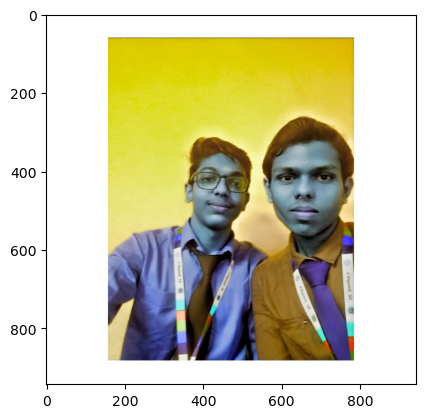

-1

In [ ]:
#color spaces 
plt.imshow(img)
plt.show()
cv.waitKey(30)

In [ ]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
cv.imshow('hsv',hsv)
cv.waitKey(30)

-1

In [ ]:
lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
cv.imshow('lab',lab)
cv.waitKey(30)

-1

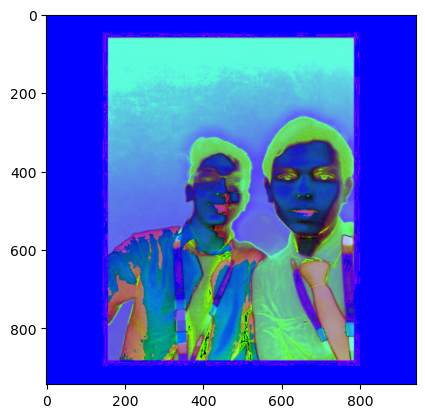

In [ ]:
plt.imshow(hsv)
plt.show()

In [ ]:
cv.destroyAllWindows()

In [ ]:
blank = np.zeros(img.shape[:2],dtype = float)
b,g,r = cv.split(img)
blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)
cv.waitKey(60)

In [ ]:
median = cv.medianBlur(img,5)
cv.imshow('median',median)
cv.waitKey(40)

-1

In [ ]:
bilateral = cv.bilateralFilter(img,10,35,25)
cv.imshow('bilateral',bilateral)
cv.waitKey(30)

-1

In [ ]:
cv.destroyAllWindows()

In [ ]:
blank = np.zeros((400,400),dtype = 'uint8')
rect = cv.rectangle(blank.copy(),(30,30),(370,370),255,-1)
cicle = cv.circle(blank.copy(),(200,200),200,255,-1)
cv.imshow('rectangle',rect)

In [ ]:
bitwise = cv.bitwise_and(rect,cicle)
cv.imshow('BitWise And',bitwise)
cv.waitKey(2)

-1

In [ ]:
bitwise_or =cv.bitwise_or(rect,cicle)
cv.imshow('bitwise_or',bitwise_or)
cv.waitKey(30)

-1

In [ ]:
masked = cv.bitwise_and(img,img)
cv.imshow('Masked image',masked)

In [ ]:
adaptive  = cv.adaptiveThreshold(gray,255.,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv.THRESH_BINARY_INV,11,9)
cv.imshow("adaptive",adaptive)
cv.waitKey(2)

-1

In [ ]:
sobelx = cv.Sobel(gray,cv.CV_64F,1,0)
sobely = cv.Sobel(gray,cv.CV_64F,0,1)
combined_sobel = cv.bitwise_and(sobelx,sobely)
lap = cv.Laplacian(gray,cv.CV_64F)
cv.imshow('lap',lap)
cv.imshow('combined',combined_sobel)

In [ ]:
canny = cv.Canny(gray,150,175)
cv.imshow('canny',canny)
cv.waitKey(20)

In [ ]:
cv.destroyAllWindows()

In [ ]:
import cv2
import time 
import pandas as pd

In [ ]:
from  datetime import datetime

In [ ]:
static_back = None 

#initialize dataframe 
currentmotion = ["",""]
motionlist = []

#capturing video
video = cv2.VideoCapture(0)

while True:
    #reading frame from video
    check,frame = video.read()
    #intialize motion 
    motion = 0
    
    #converting color image to gray scale 
    gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(21,21),0)
    
    
    #in first iteration we assign value 
    if static_back is None:
        static_back = gray 
        continue
    
    #differece between static background and currentframe 
    diff_frame = cv2.absdiff(static_back,gray)
    
    #if change in beween static background 
    thresh_frame = cv2.threshold(diff_frame,30,255,cv2.THRESH_BINARY)[1]
    thresh_frame = cv2.dilate(thresh_frame,None,iterations = 2)
    
    #finding contours of moving object 
    cnts,_ = cv.findContours(thresh_frame.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    for contours in cnts: 
        if cv2.contourArea(contours) <1000:
            motion = 1
            continue
   
        if currentmotion[0] == "" and motion == 1:
           currentmotion[0] =datetime.now().strftime("%m/%d/%y,%H:%M:%S") 
        
        (x,y,w,h) = cv2.boundingRect(contours)
    
    #makking green rectange around moving object 
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    
    if motion == 0 and currentmotion[0] != "":
       currentmotion[1] = datetime.now().strftime("%m/%d/%y,%H:%M:%S")
       motionlist.append(currentmotion)
       currentmotion = ["",""]
       
       
    #displaying the image 
    cv2.imshow("Gray FRame",gray)
    
    cv2.imshow("difference frame",diff_frame)
    
    cv2.imshow("threshold frame",thresh_frame)
    
    cv2.imshow("color frame",frame)
    
       
            
    
    key = cv2.waitKey(2)
    
    #q will enter the whole process to stop 
    
    if key == ord('q'):
        if motion == 1 and currentmotion[0] != "":
            currentmotion[1] = datetime.now().strftime("%m/%d/%Y,%H:%M:%S")
            motionlist.append(currentmotion)
        break 
    

for move in motionlist[:30]:
    print(move)
video.release()


#destroying 
cv2.destroyAllWindows()
        
    

In [ ]:
cv.destroyAllWindows()

In [2]:
import cv2  
import numpy as np

In [ ]:
bw = cv2.imread('2022-01-11-18-12-49-909.jpg')

In [ ]:
h,w = bw.shape[:2]
cv.imshow("original bw",bw)
cv.waitKey(0)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
ret,thresh = cv2.threshold(bw,70,255,cv2.THRESH_BINARY)
cv2.imshow("thresh",thresh)
cv2.waitKey(0)

In [ ]:
thresh_apt = cv2.adaptiveThreshold(bw,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,115,1)
cv2.imshow("apt",thresh_apt)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('2022-01-11-18-12-49-909.jpg')

In [3]:
img = cv2.imread('2022-01-11-18-12-49-909.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h  = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

hsv_split = np.concatenate((h,s,v),axis = 1)
cv2.imshow("split hsv",hsv_split)
cv2.waitKey(10)

In [ ]:
cv2.destroyAllWindows()

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [5]:
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

In [ ]:
cv2.imshow("binary",thresh)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img1 = img.copy()
index = -1
thickness = 4
color = (255,0,255)
objects = np.zeros([img.shape[0],img.shape[1],3],'uint8')
for c in contours:
    cv2.drawContours(objects,[c],-1,color,-1)
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c,True)
    centroid = cv2.moments(c)
    cx = int(centroid['m10']//centroid['m00'])
    cy = int(centroid['m01']//centroid['m00'])
    
    cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
    
    print(area,perimeter)
cv2.drawContours(img1,contours,index,color,thickness)
cv2.imshow("contours",img1)
cv2.waitKey(10)
cv2.destroyAllWindows()

In [28]:
cv2.destroyAllWindows()

In [27]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
res,thresh = cv2.threshold(hsv[:,:,0],25,255,cv2.THRESH_BINARY_INV)
cv2.imshow("thresh",thresh)
edges = cv2.Canny(img,100,200,apertureSize=3)
cv2.imshow("Canny",edges)
cv2.waitKey(1)


-1